In [273]:
import csv
import sklearn
from pandas import read_csv
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFdr
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
fileY=open(r"C:\\Users\sana\\Desktop\\BBBP.csv")
dataYY=csv.reader(fileY)
headerY=next(dataYY)
fileX=open(r"C:\\Users\sana\\Desktop\\bbbp_global_cdf_rdkit.csv")
dataXX=csv.reader(fileX)
headerX=next(dataXX)

In [126]:
path = r"C:\\Users\sana\\Desktop\\BBBP.csv"
dataY = read_csv(path, names = headerY)
#print(data.head())
array = dataY.values
Y = array[1:,1]
# print(Y)
pathX = r"C:\\Users\sana\\Desktop\\bbbp_global_cdf_rdkit.csv"
dataX = read_csv(pathX , names=headerX)
arrayX = dataX.values
X = arrayX[1:,]
X = np.delete(X, 0, axis=1)

In [127]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X.shape)

(2039, 200)


In [207]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test=SelectKBest(f_classif, k=15)
fit = test.fit(X_train,Y_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)
print(X_train.shape)

(1631, 15)


Models:

1) DecisionTree

In [249]:
model = DecisionTreeClassifier(splitter='random',max_depth=10)
model.fit(X_train,Y_train)
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
results = cross_val_score(model, X_train ,Y_train ,scoring='accuracy', cv=kfold)
print(results)
print(results.mean())

[0.84756098 0.88957055 0.80981595 0.85889571 0.85276074 0.88957055
 0.90797546 0.82208589 0.85276074 0.79754601]
0.852854257070178


In [250]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8553921568627451

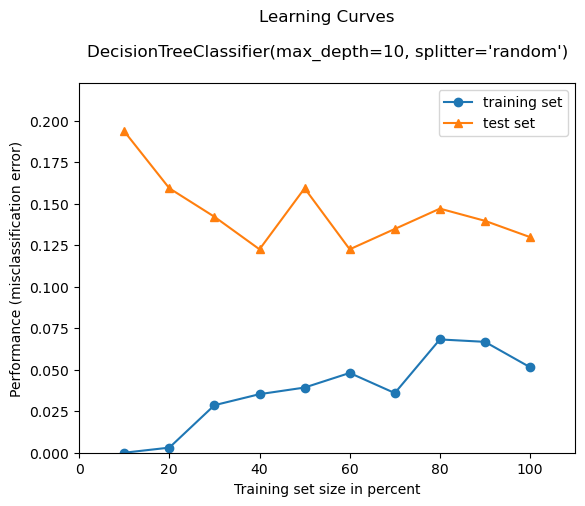

In [251]:
plot_learning_curves(X_train,Y_train,X_test,Y_test,model)
plt.show()

2)RandomForest

In [255]:
num_trees=150
max_features=15
model = RandomForestClassifier (n_estimators = num_trees,  max_features = max_features)
model.fit(X_train,Y_train)
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
results = cross_val_score(model, X_train ,Y_train, scoring='accuracy', cv=kfold)
print(results)
print(results.mean())

[0.82926829 0.9202454  0.88343558 0.86503067 0.85276074 0.92638037
 0.91411043 0.85889571 0.85889571 0.83435583]
0.874337872213078


In [256]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8897058823529411

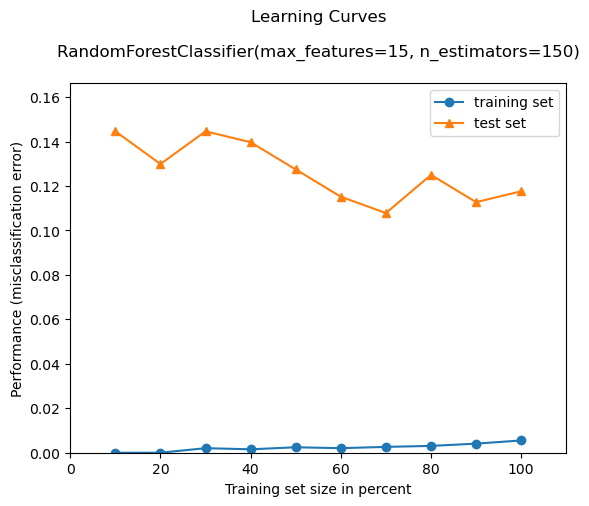

In [257]:
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()

3)Bagging

In [217]:
cart = DecisionTreeClassifier()
num_trees = 150
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7 )
model.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=150,
                  random_state=7)

In [258]:
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
results = cross_val_score(model, X_train ,Y_train,scoring='accuracy' , cv=kfold)
print(results)
print(results.mean())

[0.84146341 0.90797546 0.87116564 0.86503067 0.85276074 0.90797546
 0.89570552 0.85276074 0.85889571 0.83435583]
0.8688089181505312


In [259]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8823529411764706

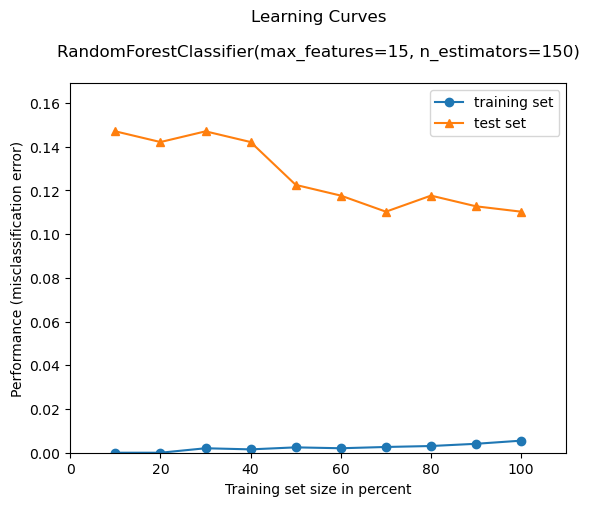

In [260]:
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()

4)Boosting

In [221]:
#Assumed you have, X (predictor) and Y (target) for training data set and test_x(predictor) of test_dataset
# Create Gradient Boosting Classifier object
model= GradientBoostingClassifier(n_estimators=100, learning_rate=0.3, max_depth=2)
# Train the model using the training sets and check score
boosting=model.fit(X_train,Y_train)

In [261]:
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
results = cross_val_score(model, X_train ,Y_train ,scoring='accuracy', cv=kfold)
print(results)
print(results.mean())

[0.84146341 0.90797546 0.87730061 0.85889571 0.85889571 0.91411043
 0.89570552 0.83435583 0.85276074 0.83435583]
0.8675819242855004


In [262]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8897058823529411

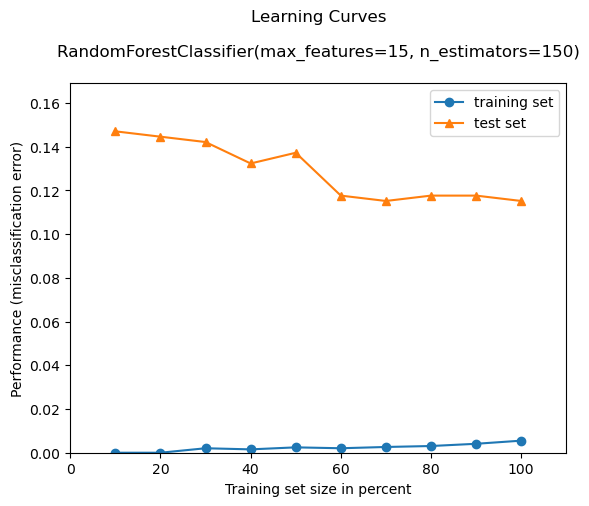

In [263]:
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()

5)Adaboostt

In [225]:
adaboostt =  AdaBoostClassifier(n_estimators=50,learning_rate=1)
model= adaboostt.fit(X_train,Y_train)

In [264]:
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
results = cross_val_score(model, X_train ,Y_train ,scoring='accuracy', cv=kfold)
print(results)
print(results.mean())

[0.84146341 0.90184049 0.87730061 0.86503067 0.8404908  0.9202454
 0.90184049 0.84662577 0.85889571 0.82822086]
0.8681954212180159


In [265]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8848039215686274

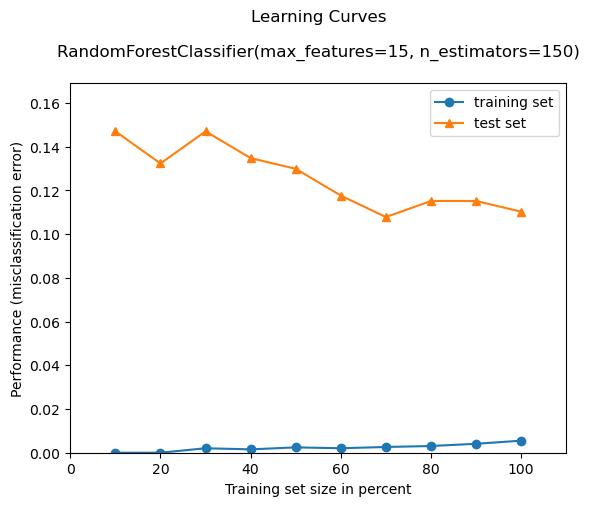

In [266]:
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()

6)Neural network MLP

In [267]:
clf = MLPClassifier(random_state=1, max_iter=1000)
model= clf.fit(X_train,Y_train)
kfold = KFold(n_splits=10, random_state=None, shuffle=False)
results = cross_val_score(model, X_train ,Y_train,scoring='accuracy' , cv=kfold)
print(results)
print(results.mean())

[0.81707317 0.89570552 0.86503067 0.86503067 0.85276074 0.90184049
 0.89570552 0.85276074 0.87116564 0.84662577]
0.8663698937602874


In [268]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8700980392156863

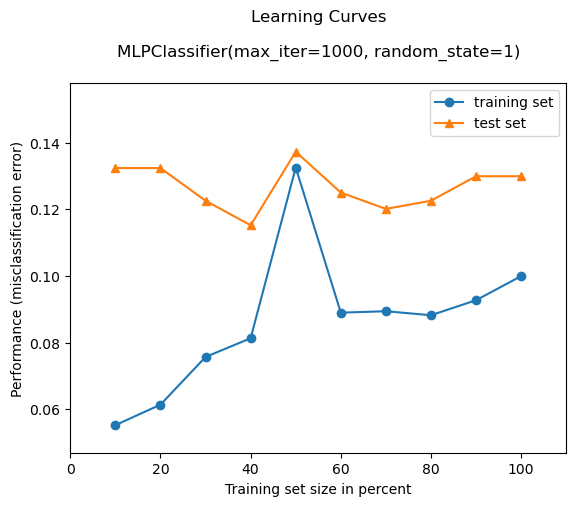

In [269]:
import warnings
warnings.simplefilter('ignore')
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()

7)SVM

In [270]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 

              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],

              'kernel': ['rbf']} 
 
st = SVC(kernel='rbf')
grid = GridSearchCV(st , param_grid)

grid.fit(X_train, Y_train)
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [274]:
svm= svm.SVC(C = 10, gamma = 0.001, kernel = 'linear')
model= svm.fit(X_train,Y_train)
results = cross_val_score(model, X_train ,Y_train,scoring='accuracy' , cv=kfold)
print(results)
print(results.mean())

[0.81097561 0.88957055 0.87116564 0.87730061 0.86503067 0.89570552
 0.88343558 0.8404908  0.85889571 0.82208589]
0.8614656591351191


In [275]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8627450980392157

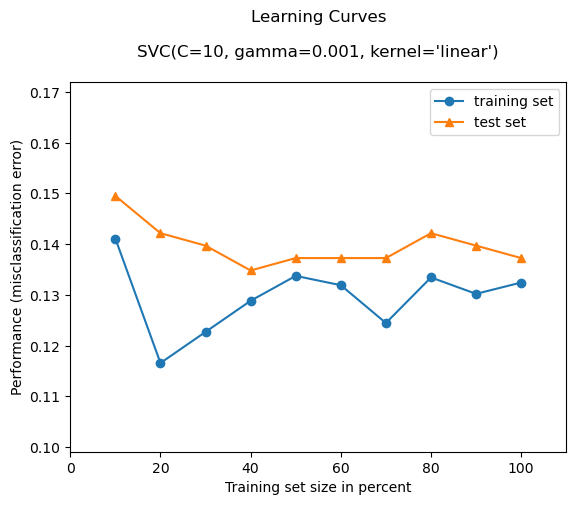

In [276]:
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()

8)KNN

In [277]:
#entekhabe behtarin k
knn = KNeighborsClassifier()
k_range = list(range(1, 50))
param_grid = dict(n_neighbors=k_range)
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
print(grid)
# fitting the model for grid search
grid_search=grid.fit(X_train ,Y_train)
print(grid_search.best_params_)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy', verbose=1)
Fitting 10 folds for each of 49 candidates, totalling 490 fits
{'n_neighbors': 10}


In [278]:
knn= KNeighborsClassifier(n_neighbors = 11 , metric='minkowski', p=2)
model=knn.fit(X_train,Y_train)
kfold = KFold(n_splits=10, random_state= 7 , shuffle=True)
results = cross_val_score(neigh, X_train ,Y_train , cv=kfold)
print(results)
print(results.mean())

[0.89634146 0.86503067 0.88343558 0.88343558 0.8404908  0.8404908
 0.86503067 0.90797546 0.81595092 0.85276074]
0.8650942690408499


In [279]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8651960784313726

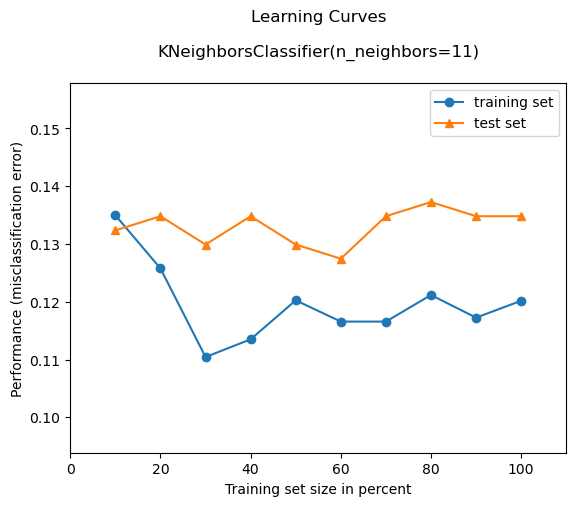

In [280]:
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()

9)LogisticRegression

In [281]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
model=logreg.fit(X_train, Y_train)
results = cross_val_score(model, X_train ,Y_train , cv=kfold)
print(results)
print(results.mean())

[0.90243902 0.84662577 0.87116564 0.88957055 0.80981595 0.8404908
 0.83435583 0.88957055 0.82208589 0.80981595]
0.8515935956905581


In [282]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8676470588235294

In [283]:
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[ 46  44]
 [ 10 308]]


In [284]:
kfold = KFold(n_splits=10, random_state= 7 , shuffle=True)
results = cross_val_score(neigh, X_train ,Y_train , cv=kfold)
print(results)
print(results.mean())

[0.89634146 0.86503067 0.88343558 0.88343558 0.8404908  0.8404908
 0.86503067 0.90797546 0.81595092 0.85276074]
0.8650942690408499


In [285]:
Y_prdict = model.predict(X_test)
accuracy_score(Y_prdict, Y_test)

0.8676470588235294

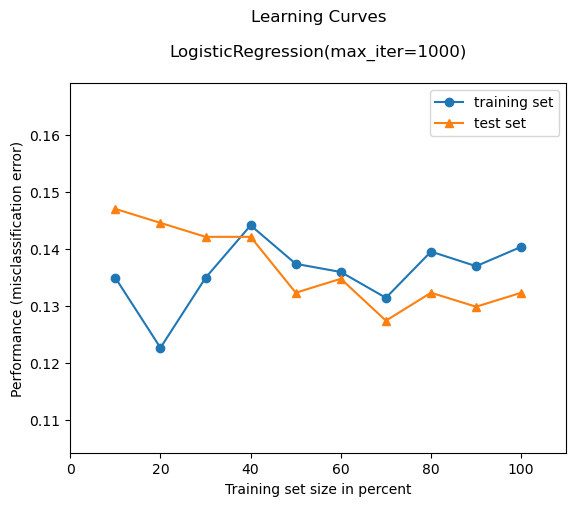

In [286]:
plot_learning_curves(X_train, Y_train,X_test,Y_test,model)
plt.show()